# Task 6: Supervised Learning (Regression)

## Simple or One variable Linear Regression

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('salaries.csv')
df.head()

,years_of_experience,salary
0,5,3150
1,9,3787
2,4,2991
3,10,4551
4,8,3540


## We now split our dataset into `x` and `y` variables. `x` is the independent variable, `y` is the dependent variable

In [8]:
x = df.iloc[:,:-1] 
# to locate outcome for a specific x at row number <first parameter> and column number <second parameter>. 
# Rows are 0 idexed, columns are 0 indexed
x

,years_of_experience
0,5
1,9
2,4
3,10
4,8
...,...
95,4
96,4
97,2
98,7


In [9]:
y = df.iloc[:,-1].values
y

array([3150, 3787, 2991, 4551, 3540, 3881, 2559, 3269, 2767, 2978, 2781,
       2632, 2237, 3281, 3940, 3467, 4708, 2328, 4109, 3286, 3952, 3417,
       3638, 3289, 2698, 3357, 2669, 3253, 2526, 2922, 3638, 3906, 2793,
       3099, 3384, 3819, 4227, 2844, 2753, 3561, 2560, 3256, 2801, 3409,
       4553, 2669, 3840, 2841, 3049, 3751, 2748, 2762, 2501, 2389, 3599,
       3751, 2825, 3442, 3432, 3335, 3569, 2749, 2669, 4033, 3845, 3632,
       3573, 3435, 3665, 3054, 3084, 3588, 3603, 3070, 3417, 3575, 3813,
       2644, 3060, 2497, 2479, 2923, 2566, 3483, 2475, 4135, 3661, 3215,
       3257, 2781, 2827, 3134, 3397, 2672, 3845, 2884, 2810, 2488, 3661,
       2496], dtype=int64)

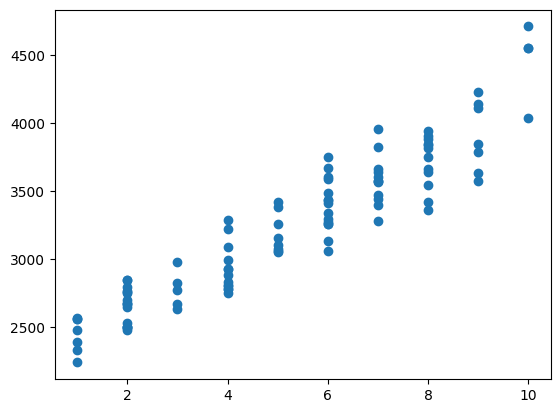

In [10]:
plt.scatter(x,y)
# produces a scatterplot of y v/s x 

In [11]:
from sklearn.model_selection import train_test_split
# sklearn.model_selection is a module, and train_test_split is a feature
# we use this feature to split data into testing and training data. Generally training:testing = 80:20 but it may sometimes be 70:30

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 0,)

# x -> the independent variable (years of experience)
# y -> the dependent variable (salary)
# test_size -> how much portion of the data should be preserved / altered for testing (0.2 = 20%)
# random_state -> parameter that disables randomness across the data split. Makes it easier to train

In [13]:
y_train

array([3409, 2669, 4551, 3588, 2669, 3049, 2559, 2496, 2566, 3813, 3569,
       2479, 2827, 3665, 2762, 3253, 4109, 2825, 4033, 3417, 3787, 2749,
       2801, 3256, 3540, 3467, 2328, 2560, 2753, 3881, 3134, 3335, 3150,
       3384, 2526, 2748, 2632, 3819, 3289, 2501, 2781, 3906, 3573, 3442,
       2497, 4135, 2793, 2475, 3940, 2781, 3286, 2922, 3751, 2488, 3661,
       3054, 3952, 3845, 3603, 2644, 3357, 2844, 2923, 3840, 3561, 3632,
       3432, 2237, 3257, 3084, 3215, 4227, 3417, 3483, 2978, 2810, 3435,
       3845, 2841, 4553], dtype=int64)

In [14]:
from sklearn.linear_model import LinearRegression
# to import the linear regression model from sklearn for training

In [15]:
model = LinearRegression()

#### nothing happens here since we didn't actually fit the data for the model to train itself on

In [16]:
model.fit(x_train, y_train)

LinearRegression()

In [17]:
model.predict([[7], [3], [5.5]])
# predict salaries for 7, 3 and 5.5 years of experience

C:\Users\tanrc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3587.02214514, 2816.37966916, 3298.03121665])

In [18]:
y_pred = model.predict(x_test)
y_pred
# predicting values based on the testing set of values we got for the x variable

array([2816.37966916, 3779.68276414, 3009.04028815, 3779.68276414,
       3587.02214514, 2623.71905016, 4165.00400213, 3201.70090715,
       3587.02214514, 3009.04028815, 2431.05843116, 3587.02214514,
       3201.70090715, 3587.02214514, 3394.36152615, 3587.02214514,
       3779.68276414, 2623.71905016, 3201.70090715, 2816.37966916])

In [19]:
error = y_pred - y_test
error

array([ 147.37966916,  118.68276414,   18.04028815,   28.68276414,
         12.02214514,  -48.28094984, -542.99599787,  131.70090715,
        -11.97785486,  125.04028815,   42.05843116,  190.02214514,
        141.70090715,  306.02214514,  125.36152615,  -50.97785486,
        141.68276414,  -74.28094984,  102.70090715,   49.37966916])

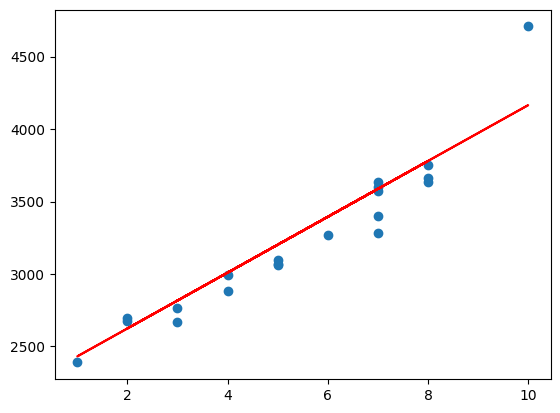

In [20]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color = 'red')

# visualizing the line of linear regression and the actual data points

In [21]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

# r2 score is a metric for telling how accurate the model is. Currently, the model's accuracy is 89.2%

0.8921287198195745

# Multi-variable Linear Regression 

In [22]:
df = pd.read_csv('california_housing_train.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [23]:
df.corr()['total_bedrooms']
# gives the correlation (link) between total_bedrooms and other variables in the dataset
# in correlation, we ignore the sign and consider only the magnitude. If it's close to 1 then the correlation is strong, else it's weak.

longitude             0.071802
latitude             -0.069373
housing_median_age   -0.320434
total_rooms           0.928403
total_bedrooms        1.000000
population            0.881169
households            0.980920
median_income        -0.013495
median_house_value    0.045783
Name: total_bedrooms, dtype: float64

In [24]:
bedrooms = df['total_bedrooms']

df = df.drop(['total_bedrooms', 'longitude', 'latitude', 'housing_median_age', 'median_income', 'median_house_value'], axis = 1)

# so we are dropping the variables that don't have a strong correlation with the bedrooms variable

df

,total_rooms,population,households
0,5612.0,1015.0,472.0
1,7650.0,1129.0,463.0
2,720.0,333.0,117.0
3,1501.0,515.0,226.0
4,1454.0,624.0,262.0
...,...,...,...
16995,2217.0,907.0,369.0
16996,2349.0,1194.0,465.0
16997,2677.0,1244.0,456.0
16998,2672.0,1298.0,478.0


In [25]:
df['bedrooms'] = bedrooms

df

,total_rooms,population,households,bedrooms
0,5612.0,1015.0,472.0,1283.0
1,7650.0,1129.0,463.0,1901.0
2,720.0,333.0,117.0,174.0
3,1501.0,515.0,226.0,337.0
4,1454.0,624.0,262.0,326.0
...,...,...,...,...
16995,2217.0,907.0,369.0,394.0
16996,2349.0,1194.0,465.0,528.0
16997,2677.0,1244.0,456.0,531.0
16998,2672.0,1298.0,478.0,552.0


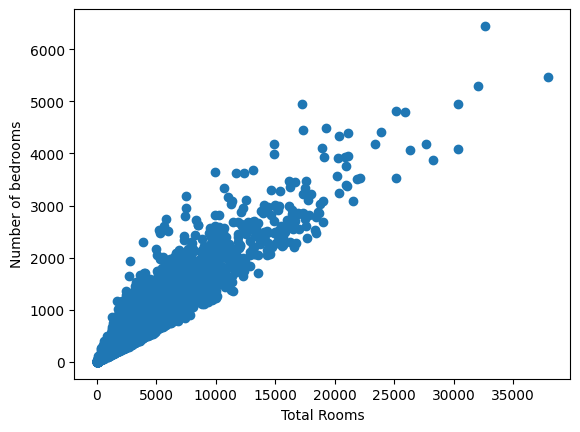

In [26]:
plt.scatter(df['total_rooms'],df['bedrooms'])
plt.xlabel('Total Rooms')
plt.ylabel('Number of bedrooms')
plt.show()

# comparing total number of rooms and total number of bedrooms in a house
# the plot clearly shows as number of rooms increases, so does the number of bedrooms => it is mostly number of bedrooms that increase

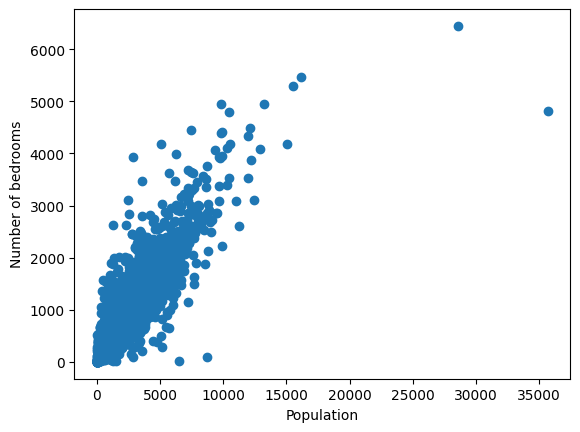

In [27]:
plt.scatter(df['population'],df['bedrooms'])
plt.xlabel('Population')
plt.ylabel('Number of bedrooms')
plt.show()

# comparing population and total number of bedrooms in a house
# the plot clearly shows as population increases, so does the number of bedrooms in a house

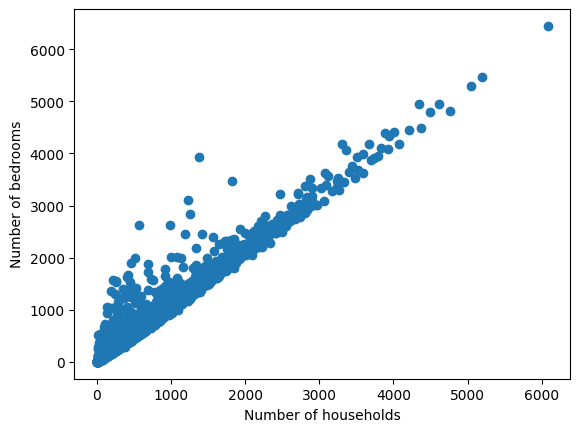

In [28]:
plt.scatter(df['households'],df['bedrooms'])
plt.xlabel('Number of households')
plt.ylabel('Number of bedrooms')
plt.show()

# comparing number of households and total number of bedrooms in a house
# it's clear that more and more households have an increasing number of bedrooms

## Now finding the relation between the number of bedrooms and the other variables.

### We assume it will be something like: y = (m1 * x1) + (m2 * x2) + .... + (mN * nN)

In [29]:
df_np = df.to_numpy()
df_np.shape

# we convert the df variable to a NumPy array to make it easier to carry out the regression
# the first 3 columns are input variables and the 4th one is the output variable (the one we need to predict)

(17000, 4)

In [30]:
# extracting / separating the training data
X_train, y_train = df_np[:, :3], df_np[:, -1]

# analysing the shape of the training data
X_train.shape, y_train.shape

((17000, 3), (17000,))

In [31]:
X_train

array([[5612., 1015.,  472.],
       [7650., 1129.,  463.],
       [ 720.,  333.,  117.],
       ...,
       [2677., 1244.,  456.],
       [2672., 1298.,  478.],
       [1820.,  806.,  270.]])

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
sklearn_model = LinearRegression()

In [34]:
sklearn_model.fit(X_train, y_train)
# training the model along our training data

sklearn_y_predictions = sklearn_model.predict(X_train)
# predicting using the model

sklearn_y_predictions
# showing the predictions

array([631.82986004, 693.11956219, 130.849378  , ..., 502.56126019,
       522.07260277, 304.4499167 ])

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# average error (magnitude), mean squared error (this is what is mostly attempted to be optimised) 

In [36]:
mean_absolute_error(sklearn_y_predictions,y_train)
# calculating the mean absolute error

39.67221765070663

In [37]:
mean_squared_error(sklearn_y_predictions,y_train)
# calculating the mean squared error

5650.631822167879

In [38]:
predictions_df = pd.DataFrame({'Population': df['population'],
                               'Households': df['households'],
                               'Total Rooms': df['total_rooms'],
                               'Bedrooms': df['bedrooms'],
                               'Sklearn Bedroom Predictions':sklearn_y_predictions})
predictions_df

,Population,Households,Total Rooms,Bedrooms,Sklearn Bedroom Predictions
0,1015.0,472.0,5612.0,1283.0,631.829860
1,1129.0,463.0,7650.0,1901.0,693.119562
2,333.0,117.0,720.0,174.0,130.849378
3,515.0,226.0,1501.0,337.0,259.462982
4,624.0,262.0,1454.0,326.0,289.315311
...,...,...,...,...,...
16995,907.0,369.0,2217.0,394.0,412.047168
16996,1194.0,465.0,2349.0,528.0,501.086730
16997,1244.0,456.0,2677.0,531.0,502.561260
16998,1298.0,478.0,2672.0,552.0,522.072603


 #### Observe how towards the end, the model got better as compared to the beginning

In [39]:
import numpy as np

In [40]:
# Assuming total_bedrooms[i] = alpha + (beta_1 * population[i]) + (beta_2 * households[i]) + (beta_3 * total_rooms[i]) + error
# Generally: y[i] = alpha + (beta_1 * x_1[i]) + (beta_2 * x_2[i]) + (beta_3 * x_3[i]) + error
# Model:     y_hat[i] = alpha_hat + (beta_1_hat * x_1[i]) + (beta_2_hat * x_2[i]) + (beta_3_hat * x_3[i])

def get_predictions(model, X):
  '''
  Obtain the predictions for the given model and inputs.

  model: np.array of Floats with shape (p,) of parameters
  X: np.array of Floats with shape (n, p-1) of inputs
  
  Returns: np.array of Floats with shape (n,).
  '''

  (n, p_minus_one) = X.shape
  p = p_minus_one + 1

  new_X = np.ones(shape=(n, p))
  new_X[:, 1:] = X

  return np.dot(new_X, model)

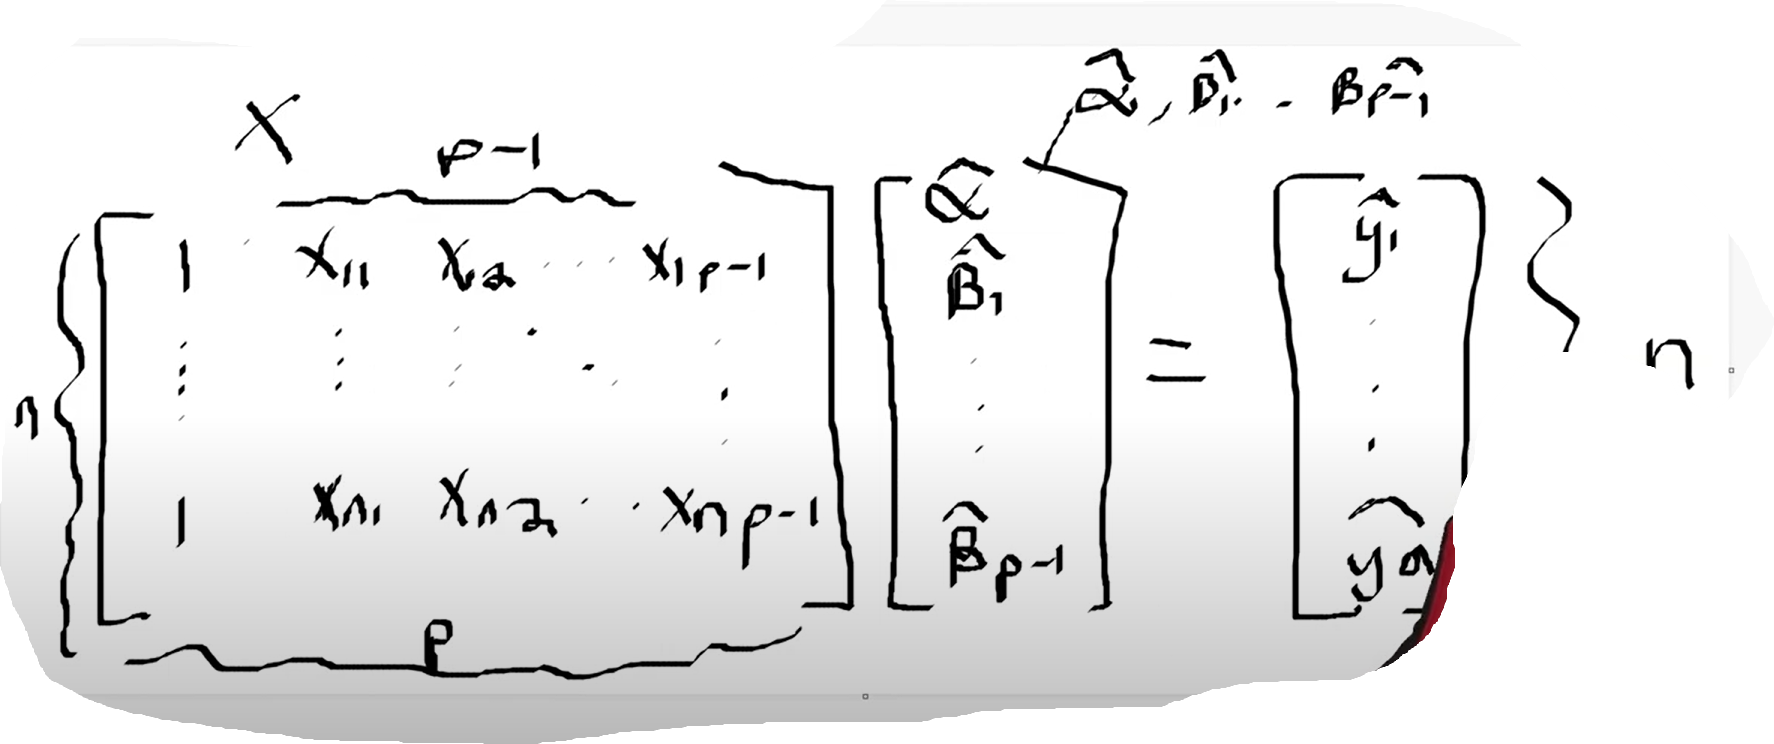

In [41]:
test_model = np.array([1,1/2,1/3,1.2])
# defining an array of some parameters for training

get_predictions(test_model, X_train)
# passing to function

array([3711.73333333, 4757.93333333,  612.4       , ..., 2301.36666667,
       2343.26666667, 1503.66666667])

In [42]:
predictions_df ['Test_Predictions'] = get_predictions(test_model,X_train)
# adding the new prediction to the predictions dataframe
predictions_df

,Population,Households,Total Rooms,Bedrooms,Sklearn Bedroom Predictions,Test_Predictions
0,1015.0,472.0,5612.0,1283.0,631.829860,3711.733333
1,1129.0,463.0,7650.0,1901.0,693.119562,4757.933333
2,333.0,117.0,720.0,174.0,130.849378,612.400000
3,515.0,226.0,1501.0,337.0,259.462982,1194.366667
4,624.0,262.0,1454.0,326.0,289.315311,1250.400000
...,...,...,...,...,...,...
16995,907.0,369.0,2217.0,394.0,412.047168,1854.633333
16996,1194.0,465.0,2349.0,528.0,501.086730,2131.500000
16997,1244.0,456.0,2677.0,531.0,502.561260,2301.366667
16998,1298.0,478.0,2672.0,552.0,522.072603,2343.266667


In [43]:
mean_squared_error(predictions_df['Test_Predictions'], y_train)

5633839.32436843

In [48]:
from numpy.linalg import inv

def get_best_model(X, y):
    '''
    Returns the model parameters that minimize the Mean Squared Error (MSE)
    using the closed-form solution of linear regression (Normal Equation).

    X: np.array of floats with shape (n, p-1) - input features (without intercept)
    y: np.array of floats with shape (n,)     - observed target values

    Returns: np.array of shape (p,) representing the learned model parameters
             (including the intercept term as the first value)
    '''

    # Get number of samples (n) and number of features (p-1)
    (n, p_minus_one) = X.shape
    p = p_minus_one + 1  # Account for the intercept term

    # Create new design matrix by adding a column of 1s for the intercept term
    new_X = np.ones(shape=(n, p))
    new_X[:, 1:] = X  # Copy original features into columns 1 through p-1

    # Compute the model parameters using the Normal Equation:
    return np.dot(np.dot(inv(np.dot(new_X.T, new_X)), new_X.T), y)


In [49]:
# Compute the best-fit model parameters using the closed-form solution
best_model = get_best_model(x_train, y_train)

# Use the learned model to make predictions on the training data
predictions_df['Best Predictions'] = get_predictions(best_model, X_train)

# Display the DataFrame containing predictions
predictions_df

ValueError: shapes (2,80) and (17000,) not aligned: 80 (dim 1) != 17000 (dim 0)

In [46]:
mean_absolute_error(predictions_df['Best Predictions'], y_train), mean_squared_error(predictions_df['Best Predictions'], y_train)

KeyError: 'Best Predictions'

Intercept: 113.76803676835885
Coefficients: [  0.         -15.53830387   1.34333191  -0.03032088]
R2 score: 0.9432150416451028


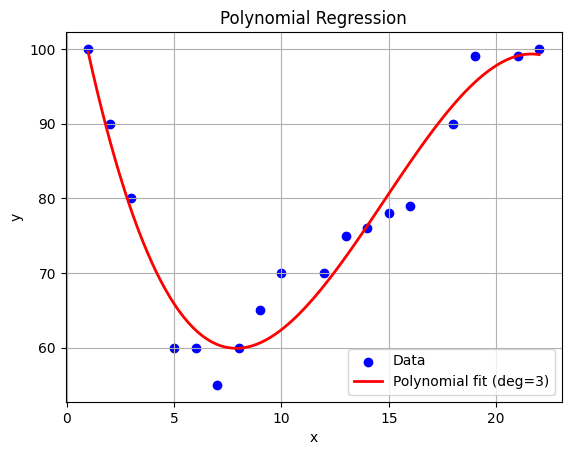

In [47]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define the input (x) and output (y) data
x = np.array([1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]).reshape(-1,1)
y = np.array([100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100])

# Create polynomial features of degree 3 (adds x² and x³ terms)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(x)

# Fit a linear regression model on the transformed (polynomial) data
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# Print the learned model parameters
print("Intercept:", poly_reg.intercept_)
print("Coefficients:", poly_reg.coef_)

# Predict the output using the trained model
y_pred = poly_reg.predict(X_poly)

# Calculate and print the R² score to evaluate model performance
print("R2 score:", r2_score(y, y_pred))

# Generate a smooth range of x values for plotting the regression curve
x_line = np.linspace(x.min(), x.max(), 100).reshape(-1,1)
y_line = poly_reg.predict(poly.transform(x_line))

# Plot the original data points and the polynomial regression curve
plt.scatter(x, y, color='blue', label='Data')  # actual data
plt.plot(x_line, y_line, color='red', linewidth=2, label='Polynomial fit (deg=3)')  # model prediction
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()
